# Task -2 Unsupervised Learning
Name : **Prince Samuvel S**

Role : **Data Science and Business Analyst**




## K-Means Clustering
Unlike supervised learning, clustering is considered an unsupervised learning method since we don’t have the ground truth to compare the output of the clustering algorithm to the true labels to evaluate its performance. We only want to try to investigate the structure of the data by grouping the data points into distinct subgroups. K-Means is a very common unsupervised algorithm for clustering.

It is referred to as an unsupervised algorithm because of the absence of the target variable.

In this task, we are going to work with the IRIS dataset

## K- Means Clustering with Python Scikit Learn

The task is from the common ‘Iris’ dataset, where we need to predict the optimum number of clusters and represent it visually. 

In [1]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
# Load the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)

# See the first 5 rows
iris_df.head() 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
#Learning more about the data
print(iris_df.columns)
print(iris_df.shape)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')
(150, 4)


In [4]:
#Describing the data using the describe function
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
#Initialising value x from the iris_dataframe
x = iris_df.iloc[:,[0,1,2,3]].values

## How the K-means algorithm works
To process the learning data, the K-means algorithm starts with a first group of randomly selected centroids, which are used as the beginning points for every cluster, and then performs iterative (repetitive) calculations to optimize the positions of the centroids

It halts creating and optimizing clusters when either:
The centroids have stabilized or the defined number of iterations has been achieved.

In [6]:
#Importing the needed library
from sklearn.cluster import KMeans
from sklearn import metrics

In [7]:
#Inertia is used to store the WCSS of the clustering in KMeans
inertia=[]

#Iterating through 10 clusters
for n in range(1,10):
  kmeans = KMeans(n_clusters = n, init = 'k-means++', max_iter = 10, random_state = 1)
  kmeans.fit(x)
  inertia.append(kmeans.inertia_)


In [8]:
#Printing the Inertia - Within Cluster Sum of Squares
print(inertia)

[681.3706, 152.34795176035792, 78.85144142614601, 57.228473214285714, 46.472230158730156, 39.03998724608725, 34.421674242424245, 30.06459307359308, 28.347370851370854]


## Using the 'Elbow Technique' to find the maximum number of clusters

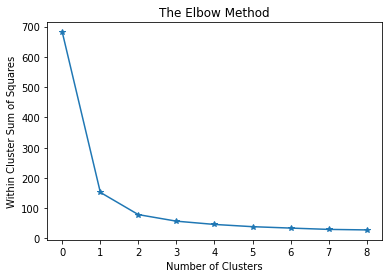

In [9]:
#Plotting the WCSS to find the elbow
plt.plot(inertia,marker='*')
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Within Cluster Sum of Squares")
plt.show()

In the elbow technique, the optimum number of clusters can be found where the elbow occurs. Here, in our graph we can see that the elbow occurs at around **3**. This is when the within cluster sum of squares (WCSS) which doesn't decrease significantly with every iteration.

So, we pick our number of clusters as 3.

## Fitting the kmeans model with k=3

In [10]:
#Creating the model with the number of clusters = 3
kmeans=KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 1)
kmeans.fit(x)
pred=kmeans.predict(x)

In [11]:
#Printing the predication of the KMeans model
print(pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [12]:
#Priting the original target of the Iris Dataset
y=iris.target
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


## Visualising the Clusters

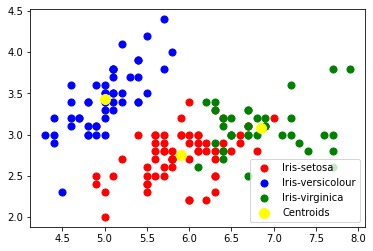

In [13]:
#Plotting the clusters for the KMeans prediction
plt.scatter(x[pred == 0, 0], x[pred == 0, 1], s = 50, c = 'red', label = 'Iris-setosa')
plt.scatter(x[pred == 1, 0], x[pred == 1, 1], s = 50, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[pred == 2, 0], x[pred == 2, 1], s = 50, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()
plt.show()

## Visualizing the actual vs predicted data

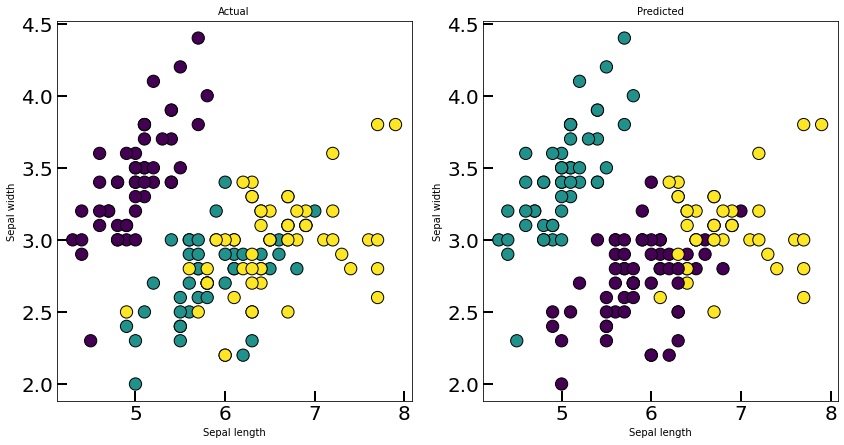

In [14]:
# Plotting the identified clusters and comparing with the results

fig, axes = plt.subplots(1, 2, figsize=(14,7))
axes[0].scatter(x[:, 0], x[:, 1], c=y, edgecolor='k', s=150)
axes[1].scatter(x[:, 0], x[:, 1], c=pred, edgecolor='k', s=150)

axes[0].set_xlabel('Sepal length', fontsize=10)
axes[0].set_ylabel('Sepal width', fontsize=10)
axes[1].set_xlabel('Sepal length', fontsize=10)
axes[1].set_ylabel('Sepal width', fontsize=10)
axes[0].tick_params(direction='in', length=10, width=2, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=2, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=10)
axes[1].set_title('Predicted', fontsize=10)
plt.show()

## Result
Thus the kmeans clustering algorithm is performed on the iris dataset with the needed visualisations and clusterizations